# Problem Definition:
As there is a lot of active research going on image/video generation and manipulation, that helps to evolve many new ways to manipulate the original sources at the same time this leads to a loss of trust in digital content, but it might even cause further harm by spreading false information and the creation of fake news. 

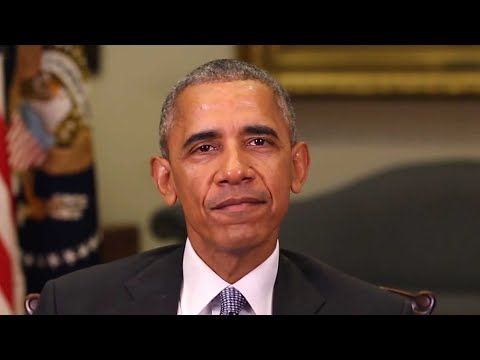

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('cQ54GDm1eL0') #Reference:https://www.youtube.com/watch?v=cQ54GDm1eL0

# Real and Fake Face detection
In this replository is a small application that uses a CNN to predict real or fake face.

Found 93738 images belonging to 2 classes.

In [47]:
from sklearn.metrics import confusion_matrix , classification_report
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense,MaxPool2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

# Dataset

First let's load in the data I've collected from the program. I will use kera's ImageDataGenerator to not only label the data from the directories but also to slightly augment the data with shifts, rotations, zooms, and mirroring. Mirroring will help to ensure that the data are not biased to a particular handedness.

In [4]:
Image_Size= (160,160)
Batch_Size = 128

In [48]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory('D:/Graduation Project/Final/real-vs-fake/train_ds',
                                                    shuffle=True,
                                                    image_size = (Image_Size),
                                                    batch_size=Batch_Size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory('D:/Graduation Project/Final/real-vs-fake/val_ds',
                                                    shuffle=True,
                                                    image_size = (Image_Size),
                                                    batch_size=Batch_Size)

test_ds = tf.keras.preprocessing.image_dataset_from_directory('D:/Graduation Project/Final/real-vs-fake/test_ds',
                                                    shuffle=True,
                                                    image_size = (Image_Size),
                                                    batch_size=Batch_Size)

Found 74992 files belonging to 2 classes.
Found 9373 files belonging to 2 classes.
Found 9373 images belonging to 2 classes.


In [6]:
class_names = train_ds.class_names
class_names

['fake', 'real']

In [7]:
for image_batch, label_batch in train_ds.take(6):
    print(image_batch.shape)
    print(label_batch.numpy())

(128, 160, 160, 3)
[1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1
 1 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1]
(128, 160, 160, 3)
[0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1
 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 1
 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1
 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0]
(128, 160, 160, 3)
[1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1
 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0
 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0]
(128, 160, 160, 3)
[1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1
 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1

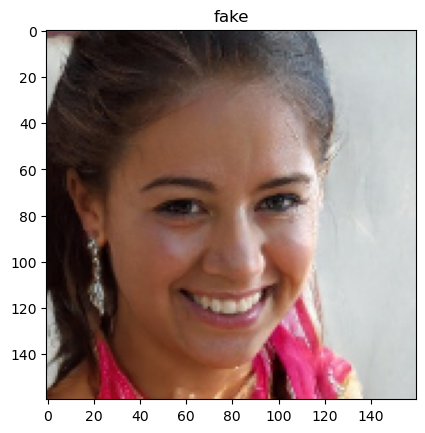

In [8]:
for image_batch, label_batch in train_ds.take(3):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])

In [9]:
print(len(train_ds),len(val_ds),len(test_ds))

586 74 74


In [10]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [11]:
data_aug = tf.keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    
])

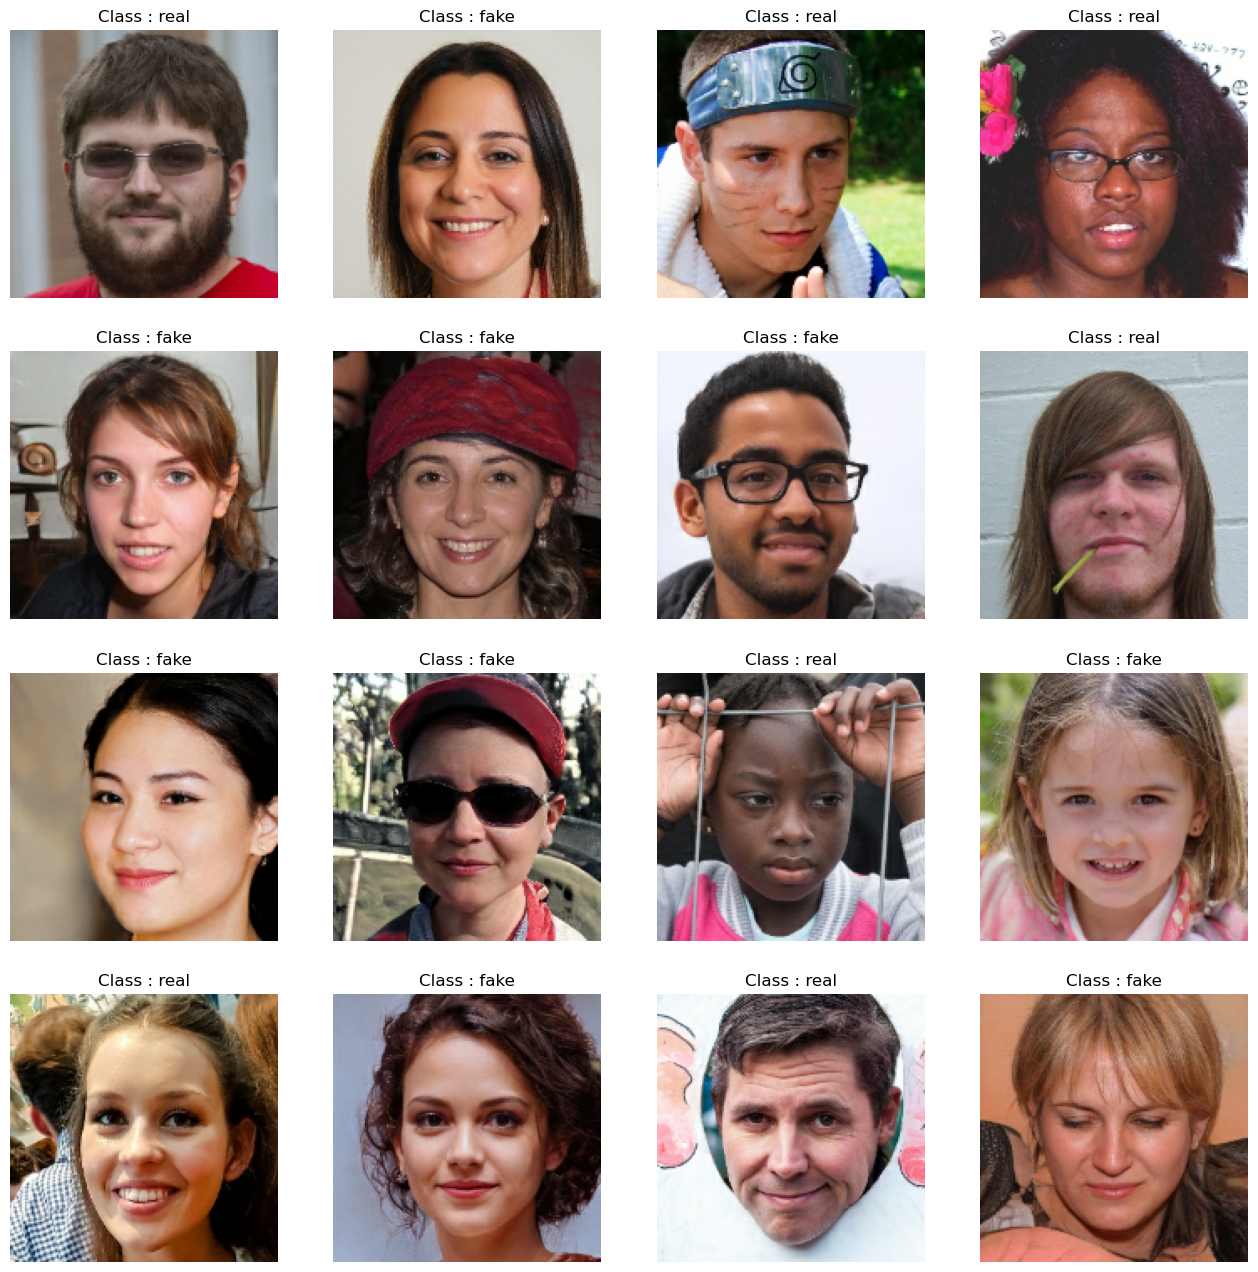

In [12]:
plt.figure(figsize=(16, 16))

for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4,4, i+1)
        plt.axis("off")
        actual_class = class_names[labels[i]]
        plt.title(f"Class : {actual_class}")
        img = np.uint8(255*images[i,:,:,0])
        plt.imshow(images[i].numpy().astype("uint8"))
        

In [13]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

# Convolutional Neural Net
The data looks resonable so now I will use MobileNet v.2 to transfer learn to our model and use within our application.

In [15]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = Image_Size + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [16]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(128, 5, 5, 1280)


In [17]:
base_model.trainable = False

In [18]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [19]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(128, 1280)


In [20]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(128, 1)


In [21]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_aug(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

##### Compile the model

In [22]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
len(model.trainable_variables)

2

In [24]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_ds)

586/586 [==============================] - 1351s 2s/step - loss: 0.7708 - accuracy: 0.5158


In [25]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.77
initial accuracy: 0.52


In [26]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/10
586/586 [==============================] - 2149s 4s/step - loss: 0.7241 - accuracy: 0.5647 - val_loss: 0.6332 - val_accuracy: 0.6142
Epoch 2/10
586/586 [==============================] - 900s 2s/step - loss: 0.6500 - accuracy: 0.6197 - val_loss: 0.6093 - val_accuracy: 0.6307
Epoch 3/10
586/586 [==============================] - 889s 2s/step - loss: 0.6238 - accuracy: 0.6416 - val_loss: 0.5981 - val_accuracy: 0.6318
Epoch 4/10
586/586 [==============================] - 889s 2s/step - loss: 0.6090 - accuracy: 0.6520 - val_loss: 0.5959 - val_accuracy: 0.6231
Epoch 5/10
586/586 [==============================] - 887s 2s/step - loss: 0.5991 - accuracy: 0.6600 - val_loss: 0.5885 - val_accuracy: 0.6321
Epoch 6/10
586/586 [==============================] - 886s 2s/step - loss: 0.5914 - accuracy: 0.6645 - val_loss: 0.5861 - val_accuracy: 0.6330
Epoch 7/10
586/586 [==============================] - 882s 2s/step - loss: 0.5877 - accuracy: 0.6700 - val_loss: 0.5799 - val_accuracy: 0.640

## Learning curves
Let's take a look at the learning curves of the training and validation accuracy/loss when using the MobileNetV2 base model as a fixed feature extractor.

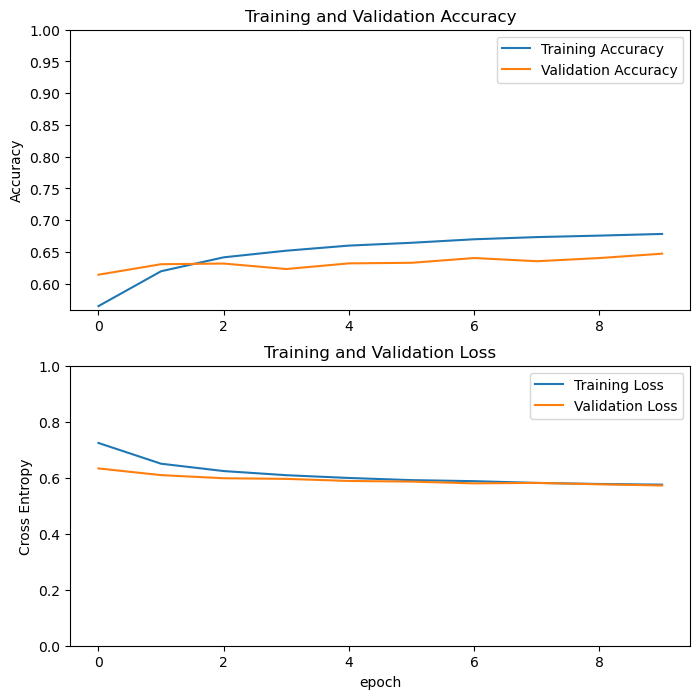

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [28]:
base_model.trainable = True

In [29]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


## Compile the model
As you are training a much larger model and want to readapt the pretrained weights, it is important to use a lower learning rate at this stage. Otherwise, your model could overfit very quickly.

In [30]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 160, 160, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 160, 160, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                             

In [32]:
len(model.trainable_variables)

56

## Continue training the model
If you trained to convergence earlier, this step will improve your accuracy by a few percentage points.

In [33]:
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='model_checkpoint.hdf5', monitor='val_loss', save_best_only=True, mode ='max'),
]

In [34]:
fine_tune_epochs = 15
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds,
                        callbacks = callbacks_list)

Epoch 10/25
586/586 [==============================] - 1109s 2s/step - loss: 0.5314 - accuracy: 0.7170 - val_loss: 0.4748 - val_accuracy: 0.7365
Epoch 11/25
586/586 [==============================] - 1100s 2s/step - loss: 0.4648 - accuracy: 0.7671 - val_loss: 0.4218 - val_accuracy: 0.7820
Epoch 12/25
586/586 [==============================] - 1100s 2s/step - loss: 0.4276 - accuracy: 0.7917 - val_loss: 0.4059 - val_accuracy: 0.7830
Epoch 13/25
586/586 [==============================] - 1104s 2s/step - loss: 0.3993 - accuracy: 0.8088 - val_loss: 0.3541 - val_accuracy: 0.8340
Epoch 14/25
586/586 [==============================] - 1100s 2s/step - loss: 0.3754 - accuracy: 0.8238 - val_loss: 0.3327 - val_accuracy: 0.8427
Epoch 15/25
586/586 [==============================] - 1109s 2s/step - loss: 0.3585 - accuracy: 0.8337 - val_loss: 0.3301 - val_accuracy: 0.8298
Epoch 16/25
586/586 [==============================] - 1140s 2s/step - loss: 0.3430 - accuracy: 0.8419 - val_loss: 0.3205 - val_ac

In [35]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

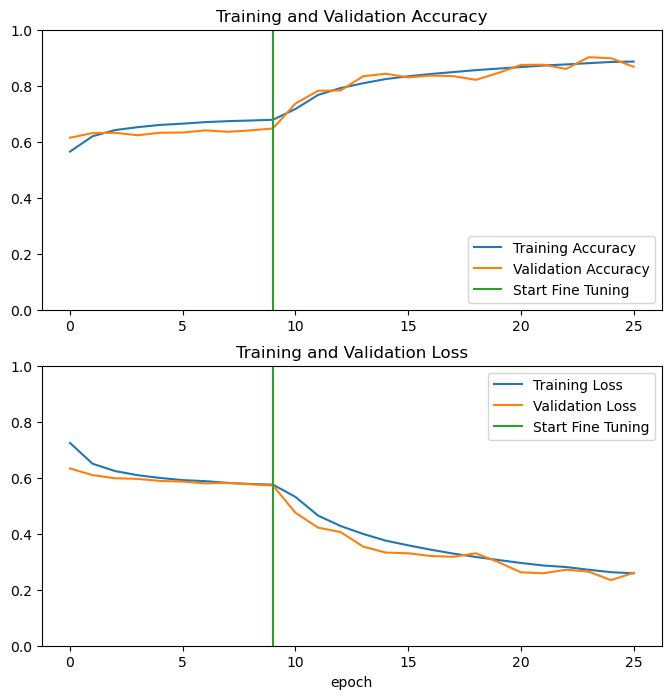

In [36]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [37]:
val_loss, val_accuracy = model.evaluate(val_ds, batch_size = Batch_Size)
print(f"validation accuracy :, {val_accuracy}")
print(f"validation loss :, {val_loss}")

586/586 [==============================] - 421s 719ms/step - loss: 0.2606 - accuracy: 0.8677
validation accuracy :, 0.867679238319397
validation loss :, 0.2606123983860016


In [38]:
test_loss, test_accuracy = model.evaluate(test_ds, batch_size = Batch_Size)
print(f"validation accuracy :, {test_accuracy}")
print(f"validation loss :, {test_loss}")

586/586 [==============================] - 424s 723ms/step - loss: 0.2606 - accuracy: 0.8677
validation accuracy :, 0.867679238319397
validation loss :, 0.26061224937438965


Predictions:
 [1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1
 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1
 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0]
Labels:
 [1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1
 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1
 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0]


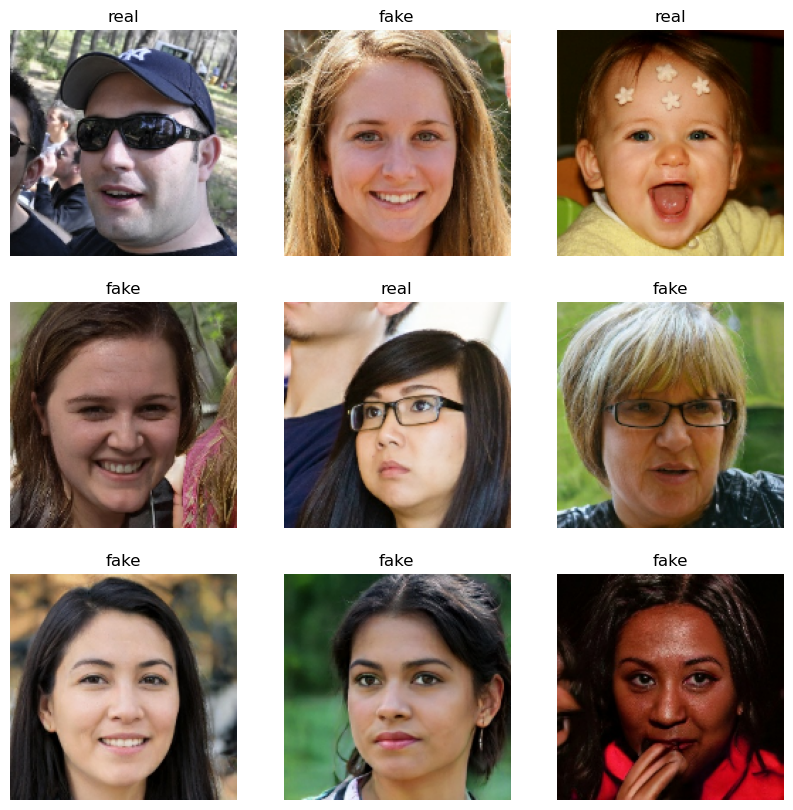

In [39]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [40]:
prediction = model.predict(test_ds)

586/586 [==============================] - 426s 726ms/step


# Prediction
Now the model is trained so I used some real images and edited that image so that we can analysis model is working correcly or not.

In [56]:
import keras.utils as image
def ImagePrediction(loc):
    test_image = image.load_img(loc, target_size = (160,160))
    plt.axis('off')
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis =0)
    result = model.predict(test_image)
    if result[0][0] == 1:
        predictions = 'Real'
    else:
        predictions = 'Fake'
    print('Prediction: ',predictions)

Enter Location of Image to predict: D:\Graduation Project\FakeFinder\13_1111.jpg
1/1 [==============================] - 0s 15ms/step
Prediction:  Fake


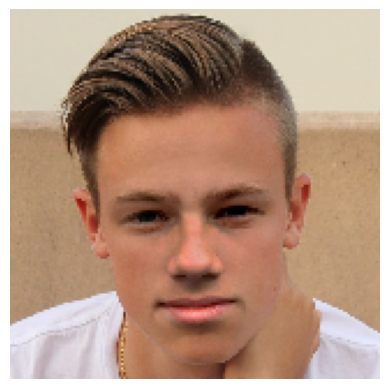

In [62]:
img = input("Enter Location of Image to predict: ")
test_image_4 = ImagePrediction(img)